In [10]:
import urllib.request 

client_id = 'v3Yb6BfQKyPyzuOSoIow'
client_secret = 'QA6WozoE5C'

In [20]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search'
    node = '/'+api_node+'.json'
    
    param_query = '?query='+ urllib.parse.quote(search_text)
    param_start = '&start=' +str(start_num)
    param_disp = '&display=' +str(disp_num)
    
    return base+node+param_query+param_start+param_disp

In [21]:
gen_search_url('book','파이썬',10,3)

'https://openapi.naver.com/v1/search/book.json?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&start=10&display=3'

In [22]:
import json
import datetime
import time 
client_id = 'v3Yb6BfQKyPyzuOSoIow'
client_secret = 'QA6WozoE5C'

def gen_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    
    return json.loads(response.read().decode("utf-8"))

In [23]:
url = gen_search_url('book', '파이썬' , 10 , 3)
one_result = gen_result_onpage(url)

[2022-11-08 10:14:02.881622] Url Request Success


In [24]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    
    return input_str

In [25]:
import pandas as pd 

def get_fields(json_data):
    title = [each['title']for each in json_data['items']]
    isbn =  [each['isbn']for each in json_data['items']]
    discount = [each['discount'] for each in json_data['items']]
    publisher = [each['publisher']for each in json_data['items']]
    link = [each['link'] for each in json_data['items']]
    
    result_pd =  pd.DataFrame({
        'title' : title,
        'isbn' : isbn,
        'discount' : discount,
        'publisher' : publisher,
        'link' : link
    }, columns=['title','discount', 'publisher', 'isbn', 'link'])
    
    return result_pd


In [26]:
pd_result = get_fields(one_result)
pd_result

,title,discount,publisher,isbn,link
0,파이썬 데이터 분석,25200,생능출판,9788970505602,https://search.shopping.naver.com/book/catalog...
1,CODING BASICS PYTHON (파이썬),18000,렉스미디어닷넷,9788959604210,https://search.shopping.naver.com/book/catalog...
2,파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...,36000,위키북스,9791158393229,https://search.shopping.naver.com/book/catalog...


In [27]:
result_book = []

for n in range(1, 1000, 100):
    url = gen_search_url('book', '파이썬', n, 100)
    json_result = gen_result_onpage(url)
    pd_result = get_fields(json_result)
    
    result_book.append(pd_result)
    
result_book = pd.concat(result_book)

[2022-11-08 10:22:17.285918] Url Request Success
[2022-11-08 10:22:17.559773] Url Request Success
[2022-11-08 10:22:17.819367] Url Request Success
[2022-11-08 10:22:18.093835] Url Request Success
[2022-11-08 10:22:18.355866] Url Request Success
[2022-11-08 10:22:18.620637] Url Request Success
[2022-11-08 10:22:18.891786] Url Request Success
[2022-11-08 10:22:19.156113] Url Request Success
[2022-11-08 10:22:19.240857] Url Request Success
[2022-11-08 10:22:19.311309] Url Request Success


In [28]:
result_book.reset_index(drop=True, inplace =True)
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      798 non-null    object
 1   discount   798 non-null    object
 2   publisher  798 non-null    object
 3   isbn       798 non-null    object
 4   link       798 non-null    object
dtypes: object(5)
memory usage: 31.3+ KB


In [29]:
## 가격의 데이터형 정리 

result_book['discount'] = result_book['discount'].astype('float')

In [30]:
result_book.loc[0]

title        파이썬과 40개의 작품들 (자동화, 크롤링, 이미지처리, 데이터분석, 웹페이지, G...
discount                                               16920.0
publisher                                                  앤써북
isbn                                             9791185553931
link         https://search.shopping.naver.com/book/catalog...
Name: 0, dtype: object

In [31]:
## url 하나 확인 

result_book.loc[0, 'link']

'https://search.shopping.naver.com/book/catalog/32472041705'

In [33]:
from bs4 import BeautifulSoup
from urllib.request import urlopen 

page = urlopen(result_book.loc[0, 'link'])
soup = BeautifulSoup(page, 'html.parser')

In [36]:
def get_page_num_in_class(list_type):
    for each in list_type:
        if each.get_text()[-1]=='쪽':
            return int(each.get_text()[:-1])

In [37]:
import numpy as np

def get_page_num(soup):
    tmp = soup.find_all(class_ ="bookBasicInfo_spec__qmQ_N")
    
    try:
        result = get_page_num_in_class(tmp)
        return result
    
    except:
        print("error in get_page_num!")
        return np.nan
    
get_page_num(soup)

In [38]:
import time
import numpy as np
page_num_col =[]

for url in result_book['link']:
    
    try:
        page_num = get_page_num(BeautifulSoup(urlopen(url), "html.parser"))
        page_num_col.append(page_num)
        
    
    except:
        print('error in get_page_num!')
        page_num_col.append(np.nan)
        
    
    print(len(page_num_col))
    time.sleep(0.5)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [39]:
page_num_col

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [41]:
raw_data = pd.read_excel('../data/python_books.xlsx', index_col = 0)
raw_data.head()

,title,discount,publisher,isbn,link,page_num
0,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),19800,한빛미디어,9791162245651,https://search.shopping.naver.com/book/catalog...,552
1,"파이썬과 40개의 작품들 (자동화, 크롤링, 이미지처리, 데이터분석, 웹페이지, G...",16920,앤써북,9791185553931,https://search.shopping.naver.com/book/catalog...,348
2,파이썬 텍스트 마이닝 완벽 가이드 (자연어 처리 기초부터 딥러닝 기반 BERT 모델까지),25200,위키북스,9791158393007,https://search.shopping.naver.com/book/catalog...,340
3,Do it! 쉽게 배우는 파이썬 데이터 분석 (데이터 분석 프로젝트 전 과정 수록!),20700,이지스퍼블리싱,9791163033493,https://search.shopping.naver.com/book/catalog...,472
4,파이썬,22500,기한재,9788970187990,https://search.shopping.naver.com/book/catalog...,374


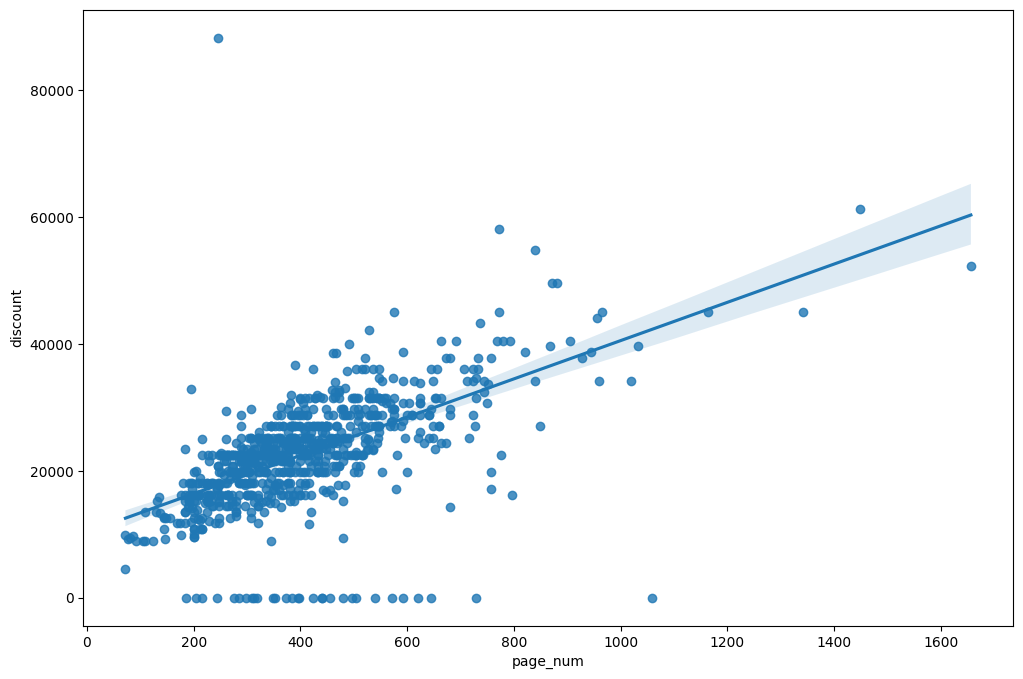

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.regplot(x = 'page_num', y= 'discount', data= raw_data)
plt.show()

In [44]:
## 결측치에 대한 확인 

raw_data[raw_data['discount']> 80000]

,title,discount,publisher,isbn,link,page_num
709,"한권으로 파이썬과 드론 날로 먹기: 인공지능편(드론포함) (파이썬의 기초문법, 응용...",88200,잇플,9791191198072,https://search.shopping.naver.com/book/catalog...,245


In [45]:
raw_data[raw_data['discount']> 80000]['link'].values

array(['https://search.shopping.naver.com/book/catalog/32438201635'],
      dtype=object)

In [46]:
raw_data['publisher'].value_counts()

에이콘출판       97
한빛미디어       76
위키북스        55
비제이퍼블릭      38
길벗          35
            ..
지란지교에듀랩      1
북스힐          1
책밥           1
경북대학교출판부     1
이한미디어        1
Name: publisher, Length: 154, dtype: int64

In [47]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') ## NANUMGOTHIC 전역 폰트로 설정하는 코드 
plt.rcParams['axes.unicode_minus'] = False

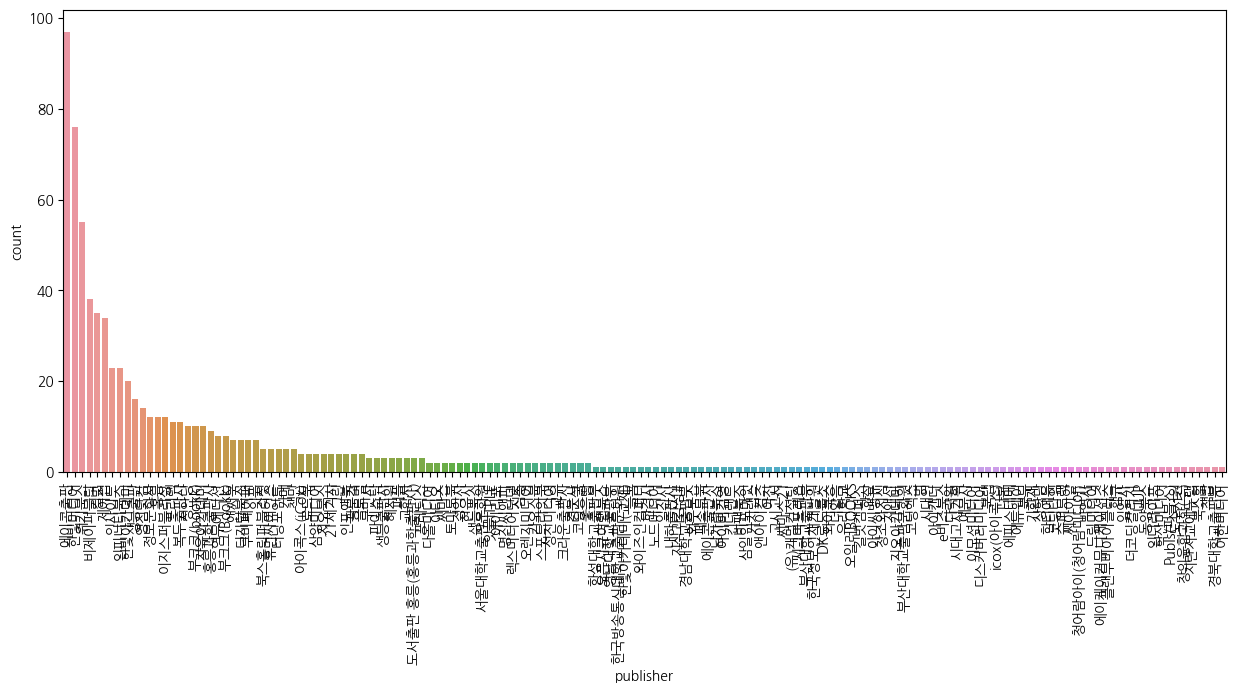

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'publisher', data =raw_data, order = raw_data['publisher'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

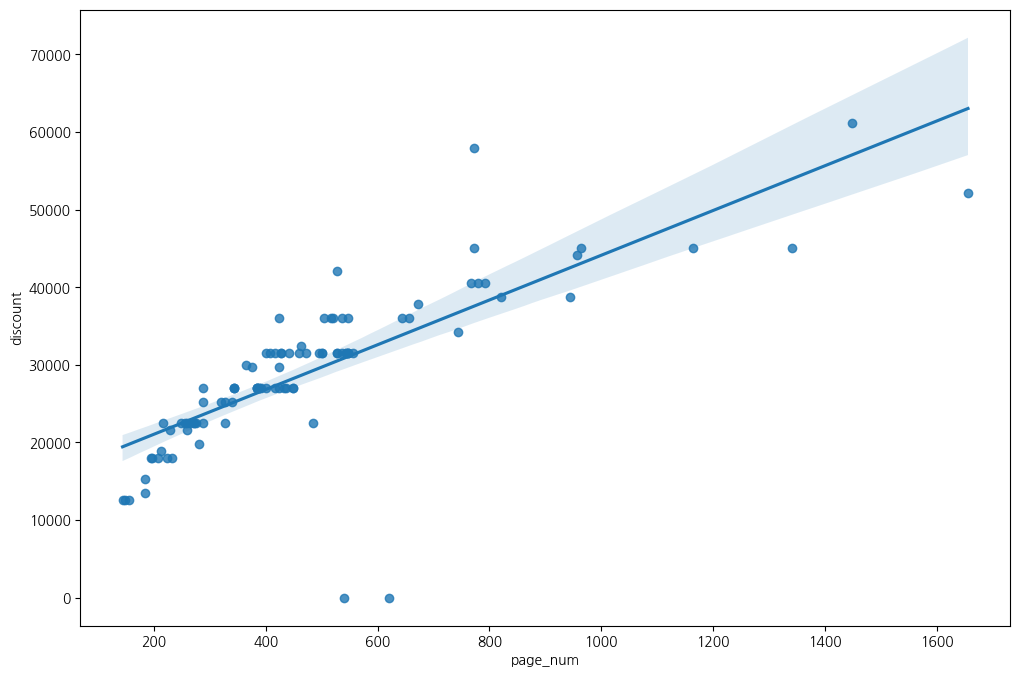

In [54]:
raw_1 = raw_data[raw_data['publisher'] == '에이콘출판']

plt.figure(figsize=(12,8))
sns.regplot(x = 'page_num', y = 'discount', data= raw_1)
plt.show()

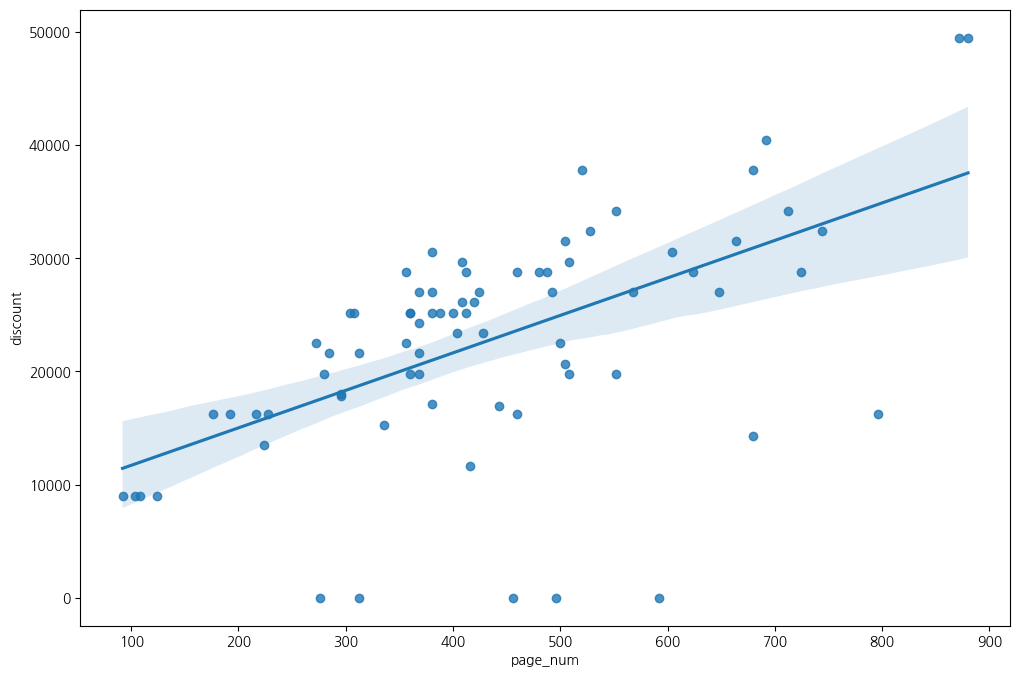

In [58]:
raw_2 = raw_data[raw_data['publisher'] == '한빛미디어']
plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='discount', data = raw_2)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X = raw_data['page_num'].values
y = raw_data['discount'].values

X_train, X_test, y_train, y_test = train_test_split (X,y , test_size = 0.2 ,random_state = 13)

In [61]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [63]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train,pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('rmse of train data :', rmse_tr)
print('rmse_ of test data : ', rmse_test)

rmse of train data : 6893.520593569095
rmse_ of test data :  7962.565414376176


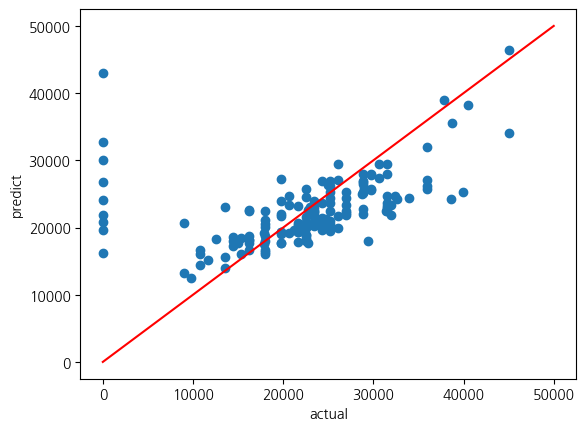

In [64]:
plt.scatter(y_test, pred_test)
plt.xlabel('actual')
plt.ylabel('predict')
plt.plot([0,50000], [0,50000], 'r')
plt.show()

In [66]:
raw_data.loc[raw_data['discount']==0, 'link'].values

array(['https://search.shopping.naver.com/book/catalog/32466807263',
       'https://search.shopping.naver.com/book/catalog/32492647835',
       'https://search.shopping.naver.com/book/catalog/32467009890',
       'https://search.shopping.naver.com/book/catalog/32492616608',
       'https://search.shopping.naver.com/book/catalog/32492773606',
       'https://search.shopping.naver.com/book/catalog/32436264737',
       'https://search.shopping.naver.com/book/catalog/32484549327',
       'https://search.shopping.naver.com/book/catalog/32491810936',
       'https://search.shopping.naver.com/book/catalog/32436121442',
       'https://search.shopping.naver.com/book/catalog/32496187270',
       'https://search.shopping.naver.com/book/catalog/32456214628',
       'https://search.shopping.naver.com/book/catalog/32506638816',
       'https://search.shopping.naver.com/book/catalog/32485102181',
       'https://search.shopping.naver.com/book/catalog/32492766283',
       'https://search.shopping.na

In [69]:
X = raw_1['page_num'].values
y = raw_1['discount'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state=13)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

reg.fit(X_train, y_train)

LinearRegression()

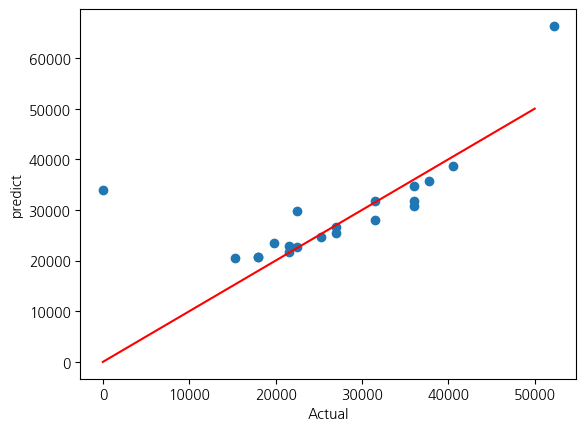

In [71]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

plt.scatter(y_test,pred_test)
plt.xlabel('Actual')
plt.ylabel('predict')
plt.plot([0,50000],[0,50000], 'r')
plt.show()